In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [2]:
sys.path.append('..')

## Calculating Vaccine Coverage for Municipalities

In [3]:
def coverage_age(p,e):
    return (1 +((1-e)*((1/p) -1)))**-1

### 10 municipalities with the most cases

In [4]:
first_10 = [355030., 130260., 150140., 410690., 150080., 351880., 130250.,
       330455., 351630., 160030.]

In [5]:
df_mun = pd.read_csv('../Data/analyzed/age_vaccine_municipalities.csv')
mun_path = '../Data/municipalities.csv'
mun_file = pd.read_csv(mun_path)
mun_file['codigo'] = mun_file['municipio'].astype(str).str[:6].astype(int)
mun_file = mun_file[['municipio','name','codigo']]
df_mun = df_mun.merge(mun_file, how = 'left', left_on = 'ID_MN_RESI', right_on = 'codigo')

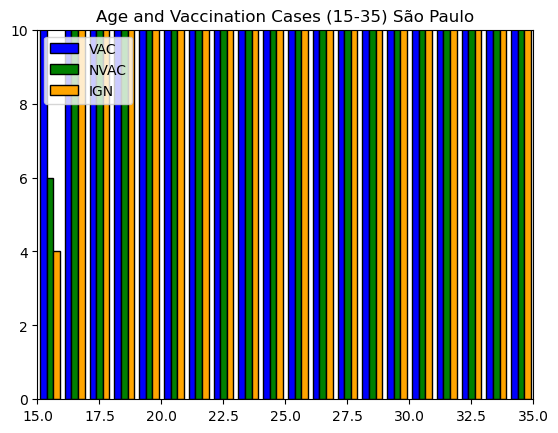

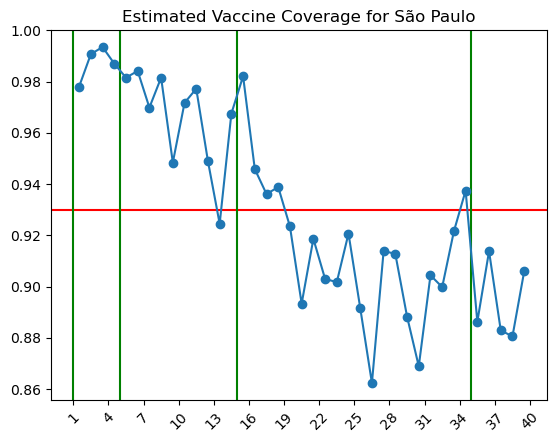

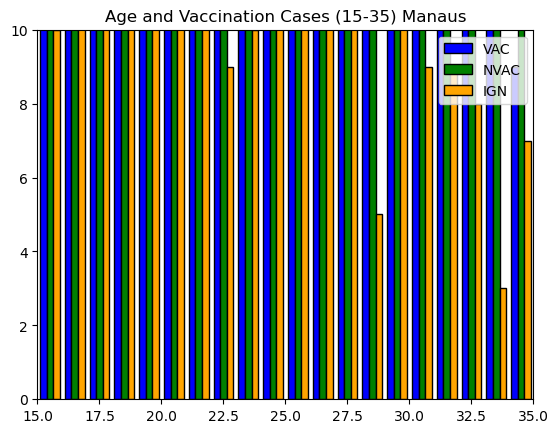

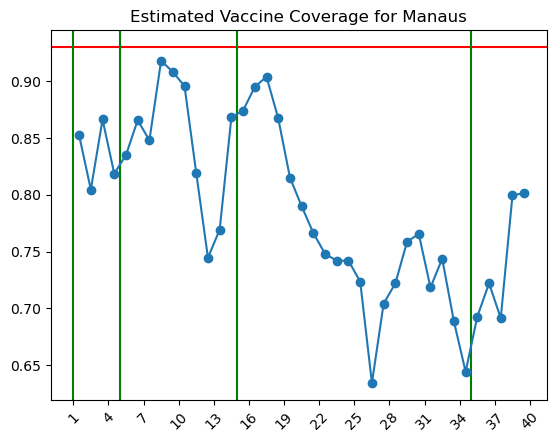

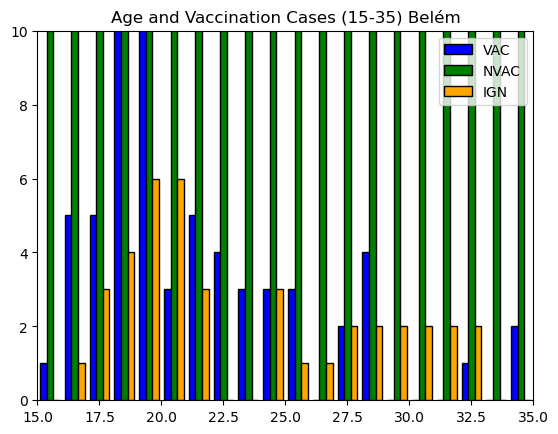

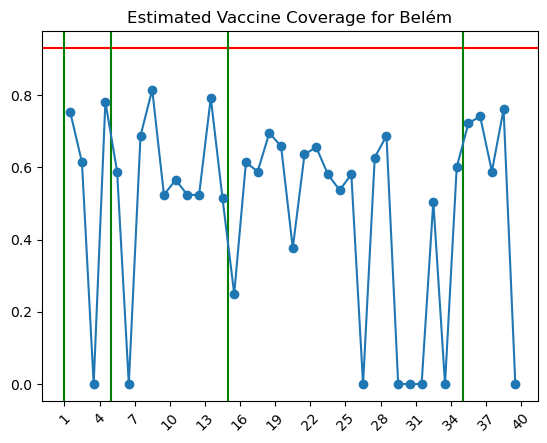

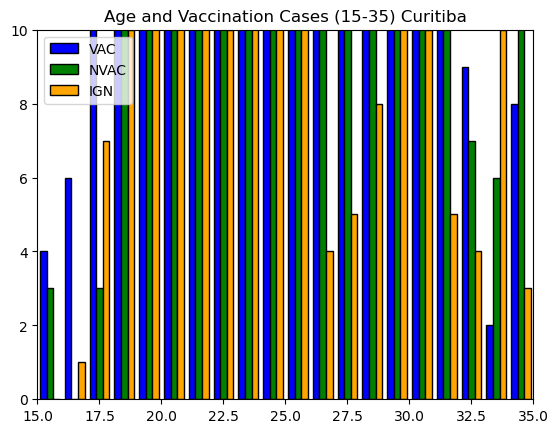

C:\Users\denis\AppData\Local\Temp\ipykernel_15000\995915562.py:24: RuntimeWarning: invalid value encountered in divide
  p_vacs = vacs/(vacs+nvacs)


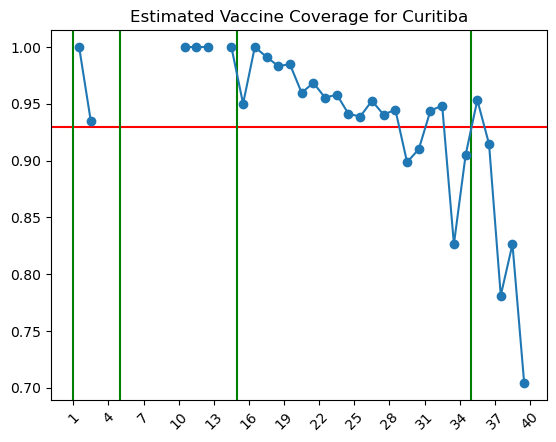

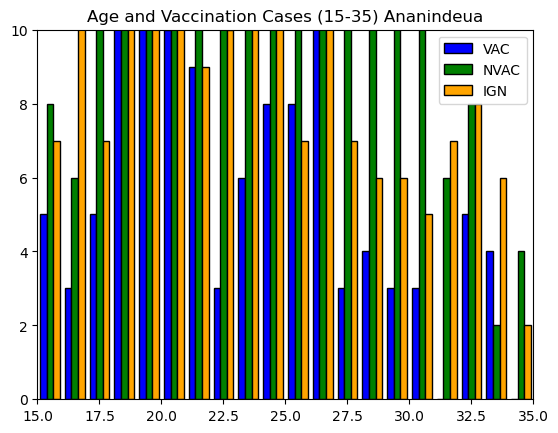

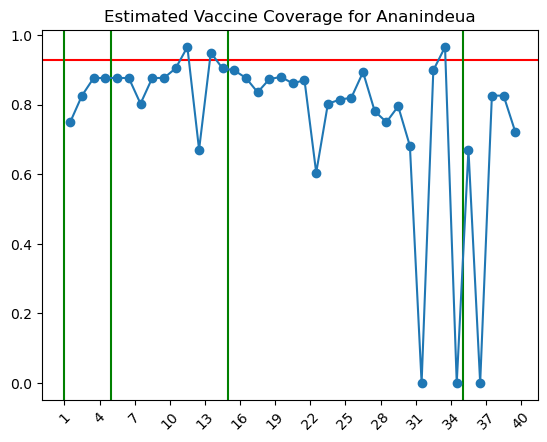

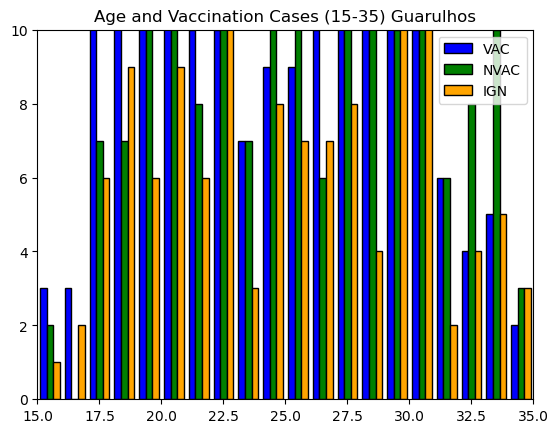

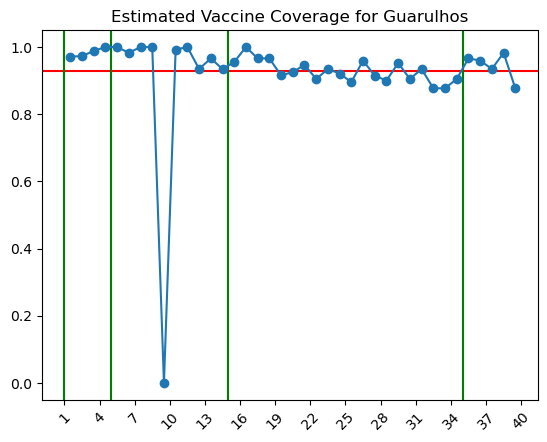

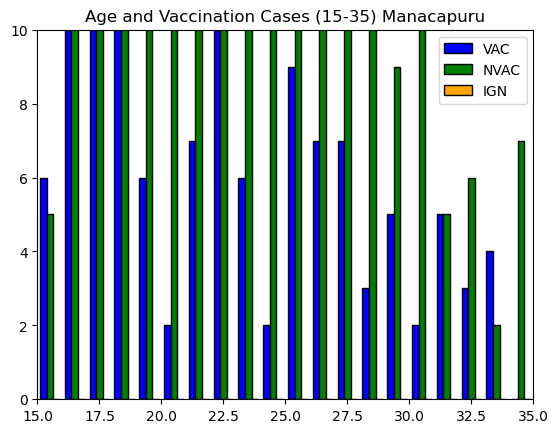

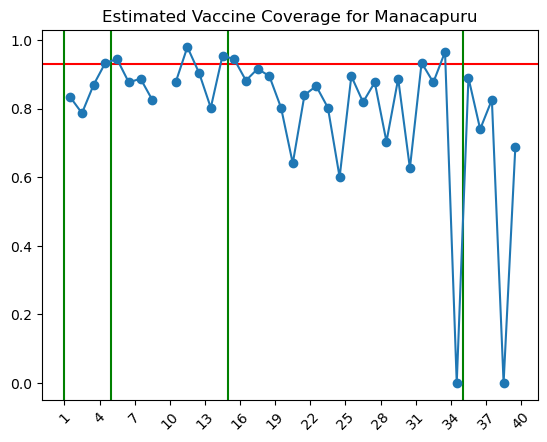

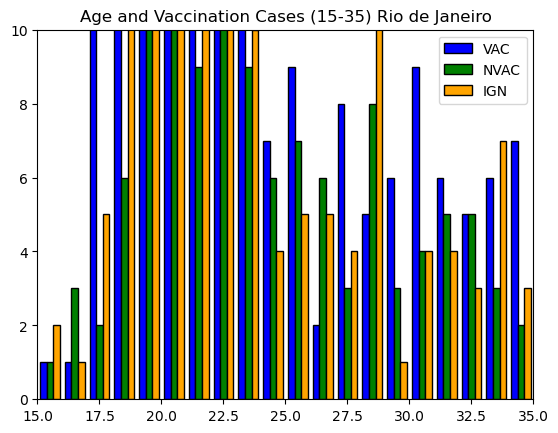

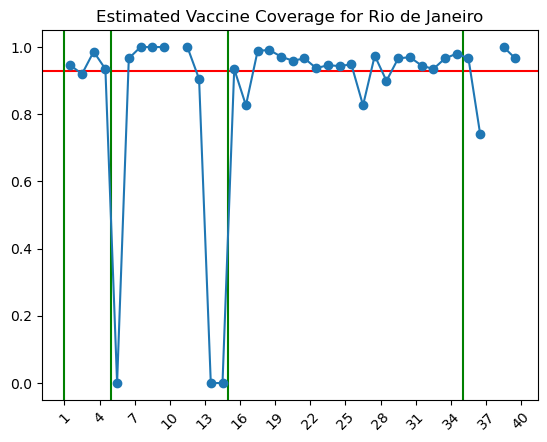

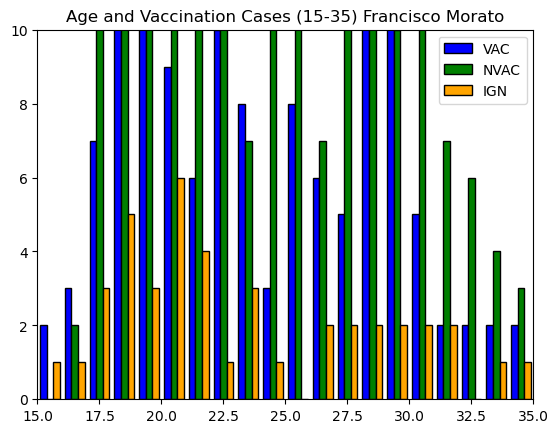

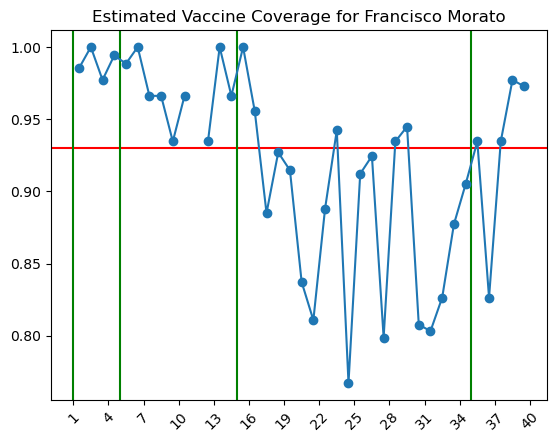

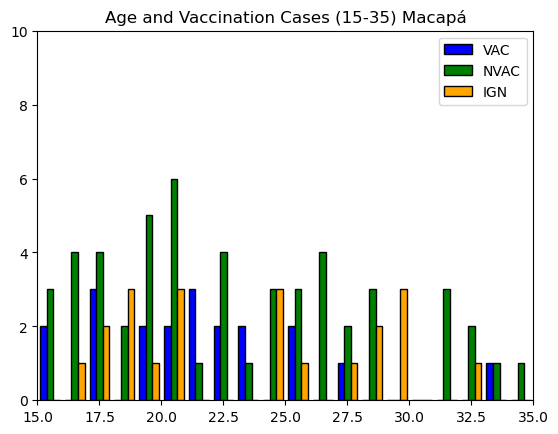

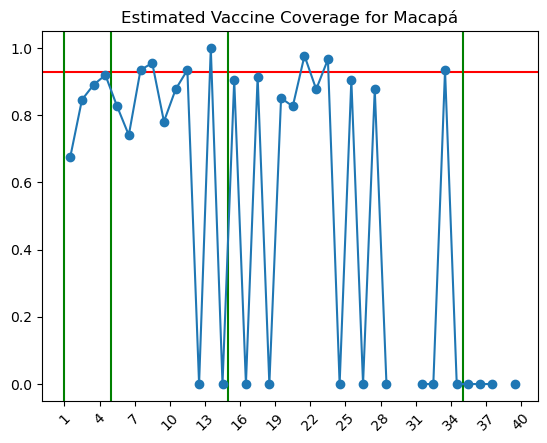

In [6]:
for mun in first_10:
    df_tmp = df_mun[df_mun['ID_MN_RESI'] == mun]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 40]
    mun_name = df_tmp['name'].unique()[0]
    min_age = 0
    max_age = 40
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=np.arange(0,max_age+1,1), edgecolor = 'black')
    plt.title('Age and Vaccination Cases (15-35) '+ str(mun_name))
    plt.legend()
    plt.xlim((15,35))
    plt.ylim((0,10))
    plt.show()
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    vacs = vacs[1:]
    nvacs = nvacs[1:]
    ign = ign[1:]
    p_vacs = vacs/(vacs+nvacs)
    c_vacs = []
    for p in p_vacs:
        if(p == np.nan):
            c_vacs.append(np.nan)
        elif(p == 0):
            c_vacs.append(0)
        else:
            c_vacs.append(coverage_age(p,0.93))
    plt.xticks(np.arange(1,max_age+1,3), rotation = 45)
    plt.axhline(0.93,color = 'r')
    plt.axvline(1, color = 'g')
    plt.axvline(5, color = 'g')
    plt.axvline(15, color = 'g')
    plt.axvline(35, color = 'g')
    plt.title('Estimated Vaccine Coverage for '+ str(mun_name))
    plt.plot(bins[1][1:-1] + 0.5,c_vacs,'-o')
    plt.show()

### Including the ignored cases as a best case scenario

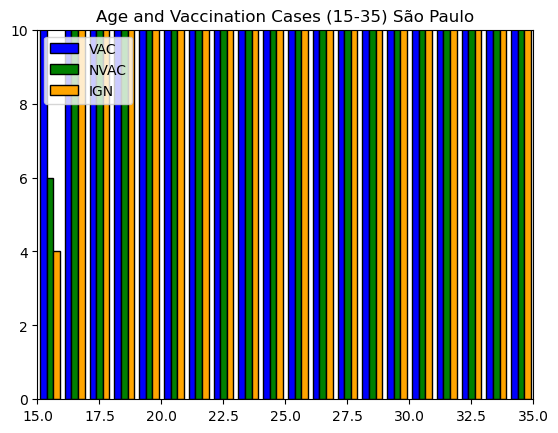

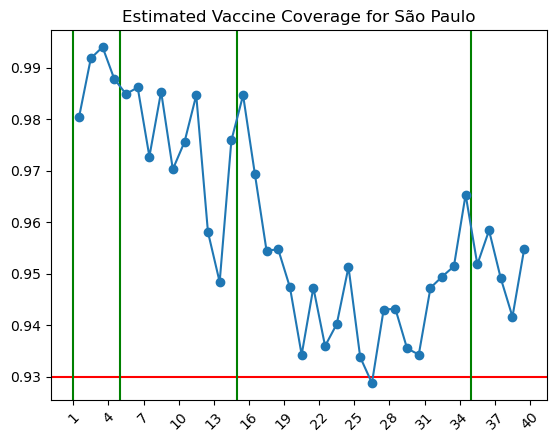

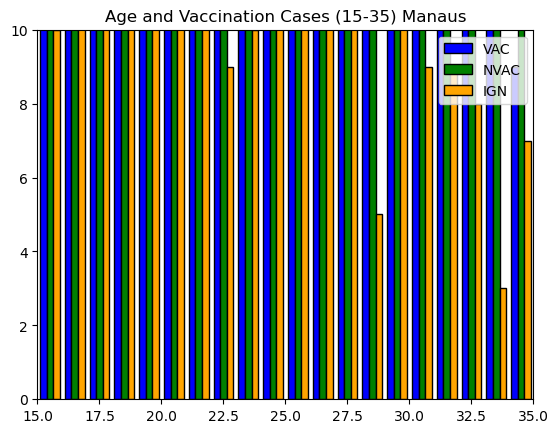

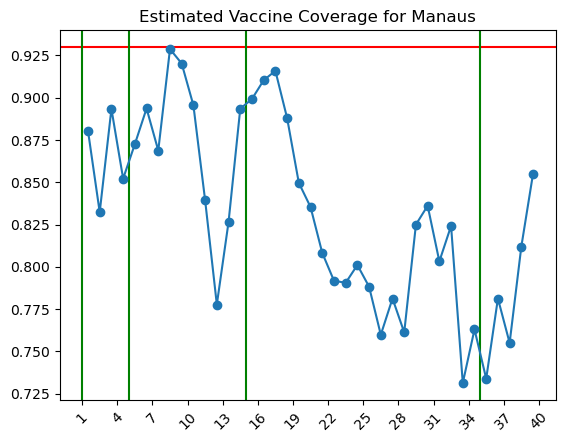

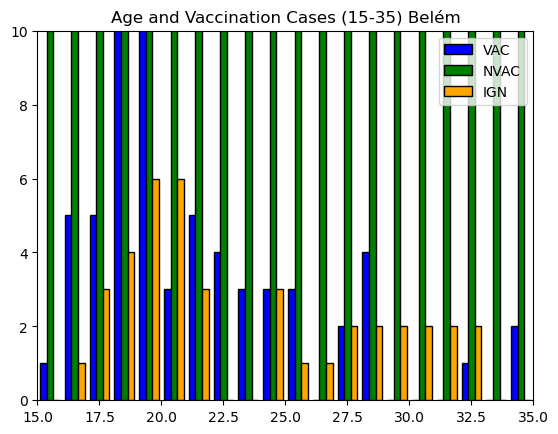

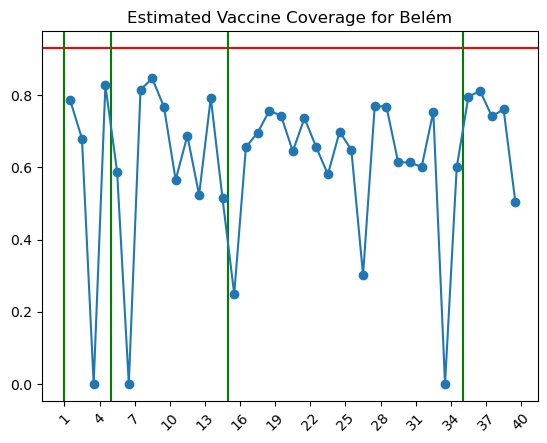

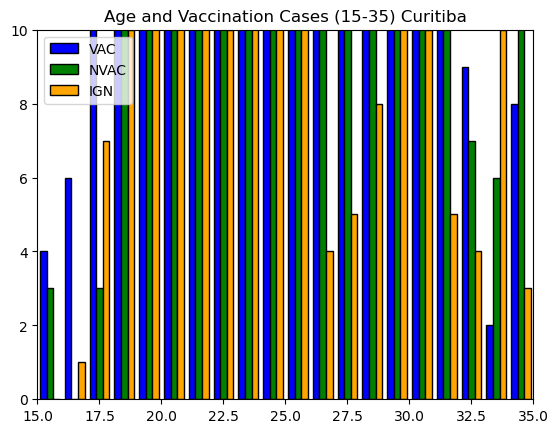

C:\Users\denis\AppData\Local\Temp\ipykernel_15000\268519298.py:25: RuntimeWarning: invalid value encountered in divide
  p_vacs = vacs/(vacs+nvacs)


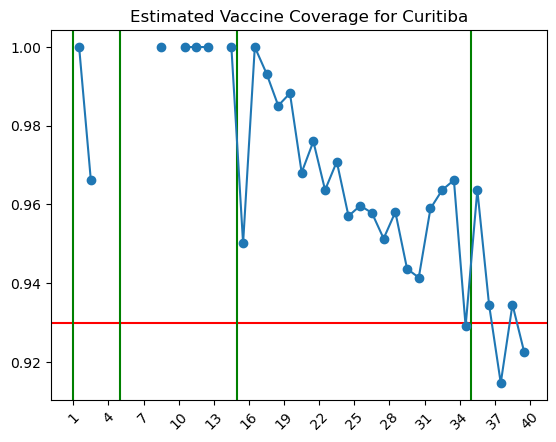

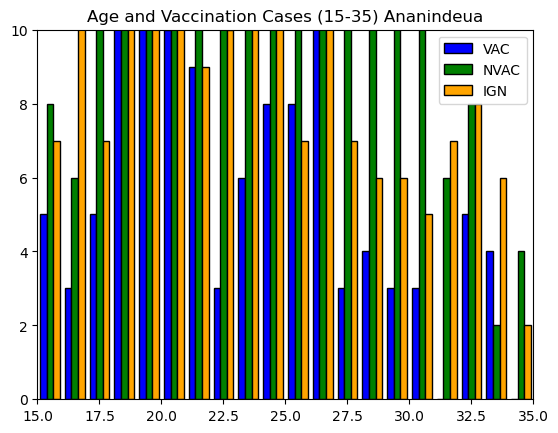

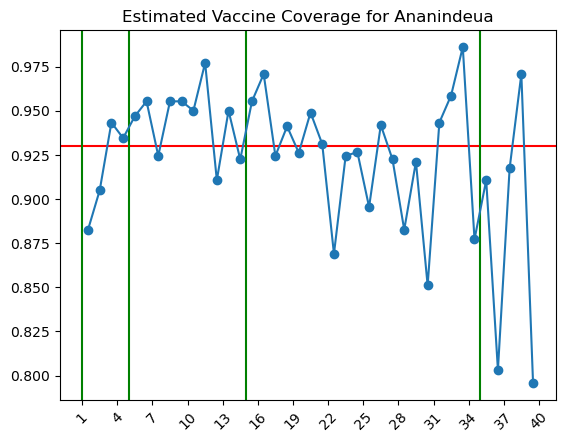

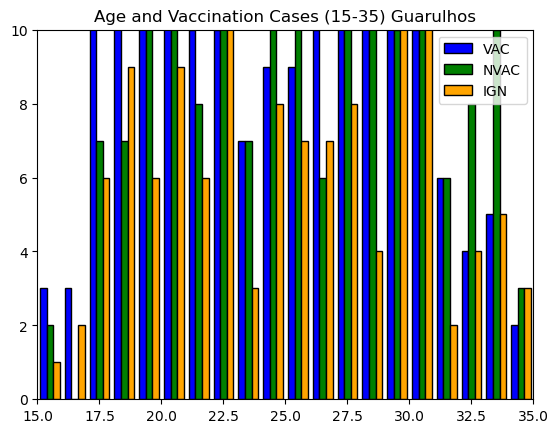

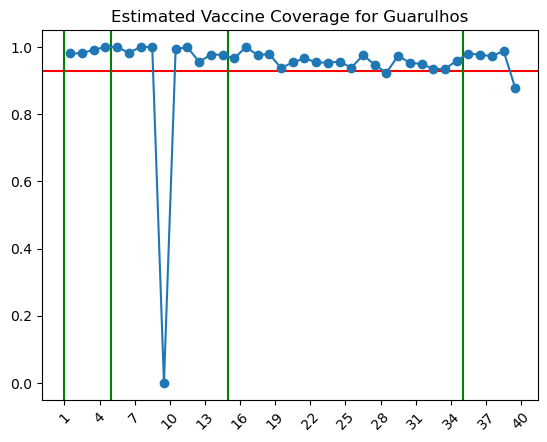

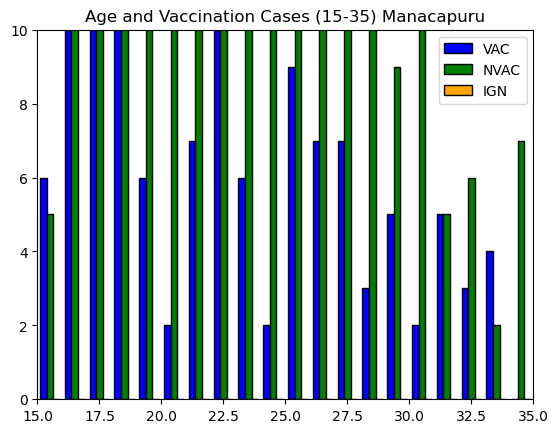

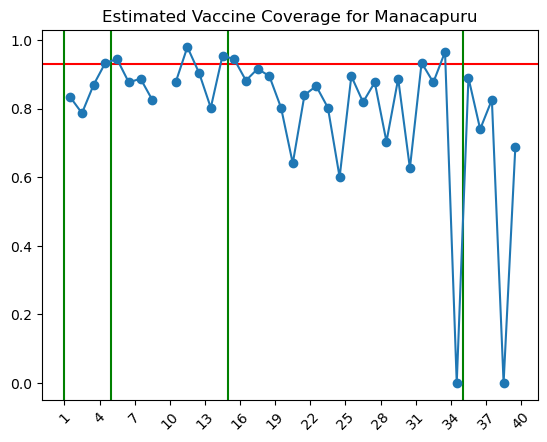

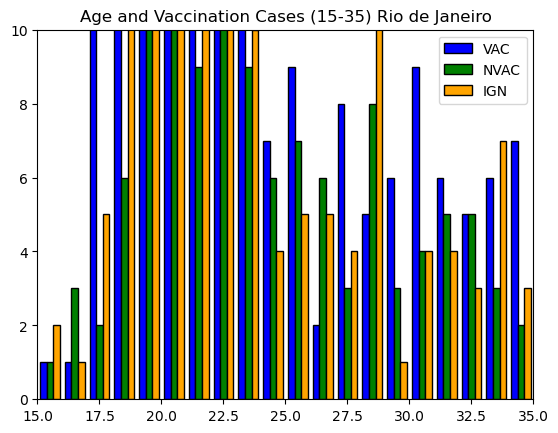

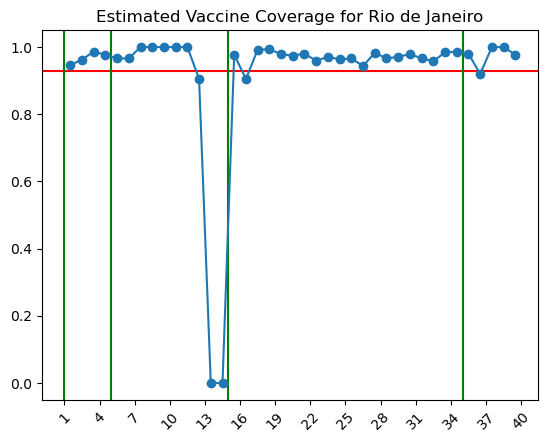

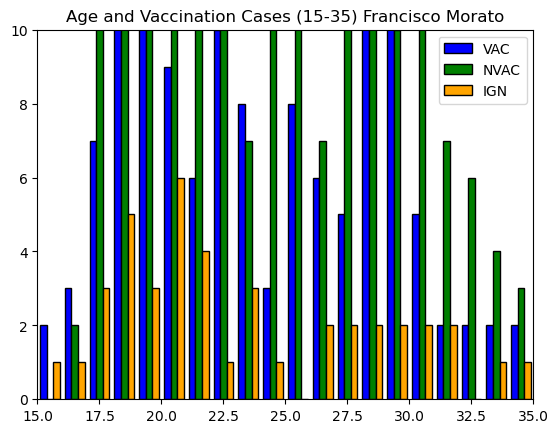

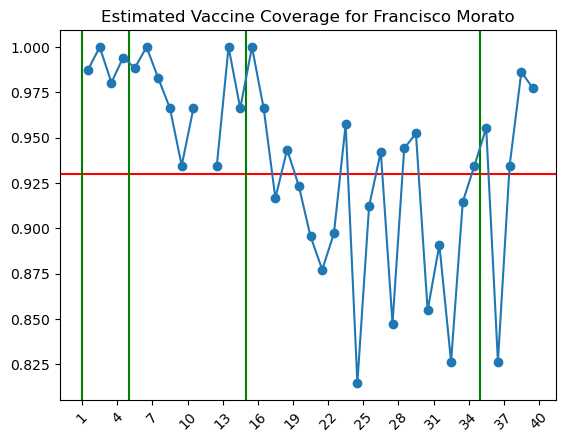

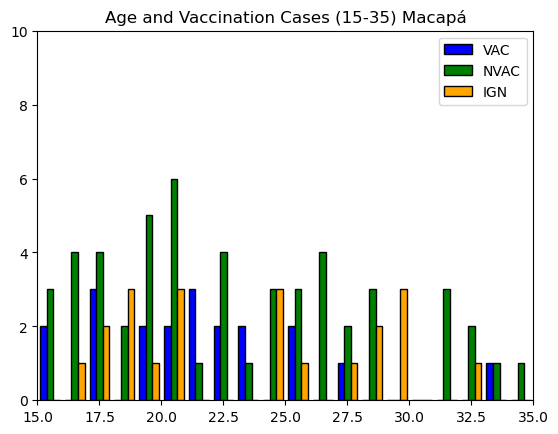

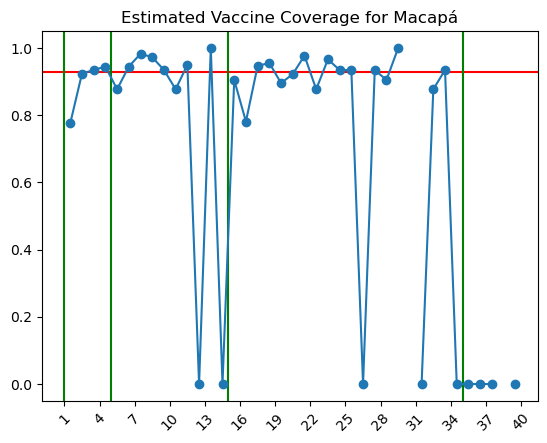

In [7]:
for mun in first_10:
    df_tmp = df_mun[df_mun['ID_MN_RESI'] == mun]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 40]
    mun_name = df_tmp['name'].unique()[0]
    min_age = 0
    max_age = 40
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=np.arange(0,max_age+1,1), edgecolor = 'black')
    plt.title('Age and Vaccination Cases (15-35) '+ str(mun_name))
    plt.legend()
    plt.xlim((15,35))
    plt.ylim((0,10))
    plt.show()
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    vacs = vacs[1:]
    nvacs = nvacs[1:]
    ign = ign[1:]
    vacs = vacs + ign
    p_vacs = vacs/(vacs+nvacs)
    c_vacs = []
    for p in p_vacs:
        if(p == np.nan):
            c_vacs.append(np.nan)
        elif(p == 0):
            c_vacs.append(0)
        else:
            c_vacs.append(coverage_age(p,0.93))
    plt.xticks(np.arange(1,max_age+1,3), rotation = 45)
    plt.axhline(0.93,color = 'r')
    plt.axvline(1, color = 'g')
    plt.axvline(5, color = 'g')
    plt.axvline(15, color = 'g')
    plt.axvline(35, color = 'g')
    plt.title('Estimated Vaccine Coverage for '+ str(mun_name))
    plt.plot(bins[1][1:-1] + 0.5,c_vacs,'-o')
    plt.show()

## Comparing with the official vaccine coverage

In [8]:
df_1 = pd.read_csv('../Data/CV_TP_1_MUN.csv', encoding='cp1252', delimiter = ';', decimal = ',')
df_1 = df_1.drop(df_1.tail(1).index)
df_1['ID_MUNICIP'] = df_1['Município'].str[:6].astype(int)

In [9]:
df_1 = df_1[df_1['ID_MUNICIP'].isin(first_10)]

In [10]:
df_1 = df_1[['ID_MUNICIP','1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]

In [11]:
first_10_years = [2019,2018,2020,2019,2020,2019,2018,2019,2019,2020]

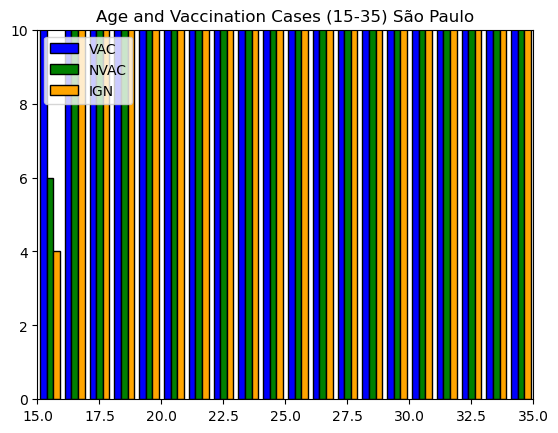

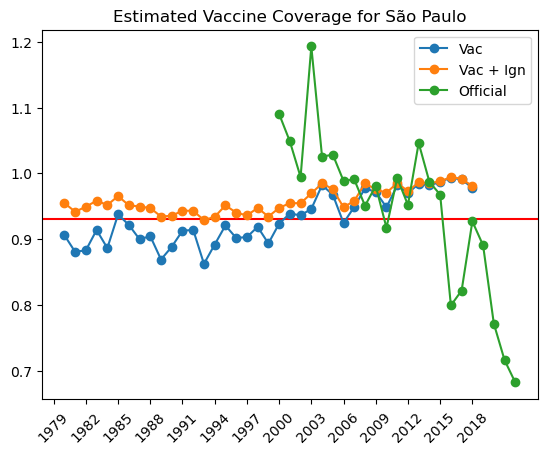

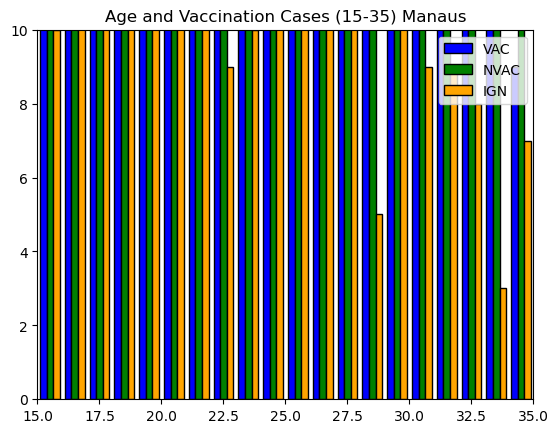

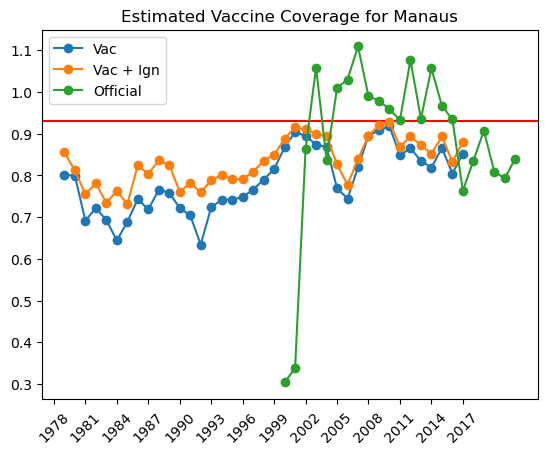

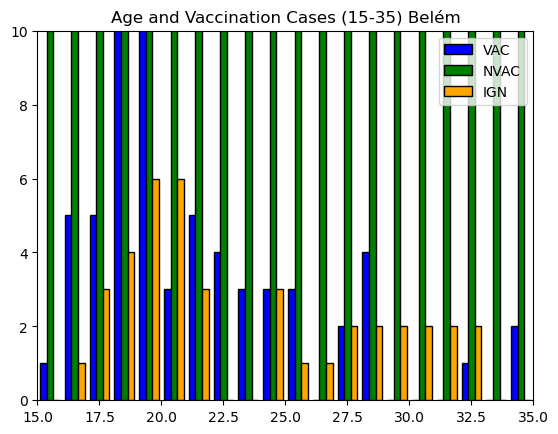

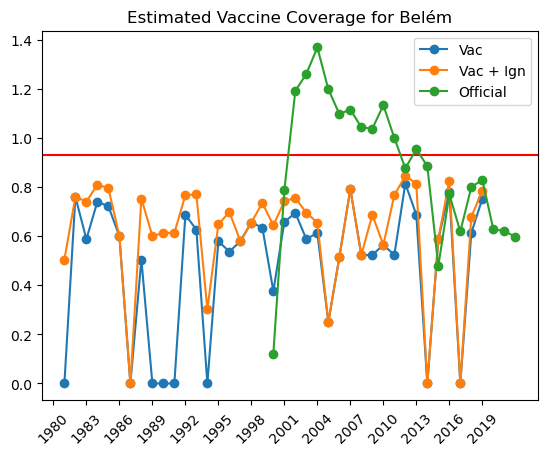

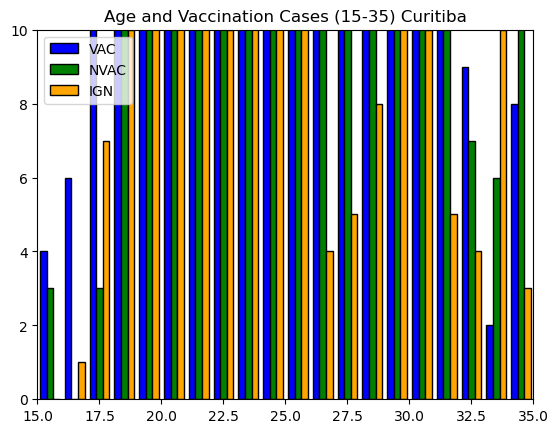

C:\Users\denis\AppData\Local\Temp\ipykernel_15000\4002450179.py:27: RuntimeWarning: invalid value encountered in divide
  p_vacs = vacs/(vacs+nvacs)
C:\Users\denis\AppData\Local\Temp\ipykernel_15000\4002450179.py:28: RuntimeWarning: invalid value encountered in divide
  p_vacs_2 = vacs_2/(vacs_2 + nvacs)


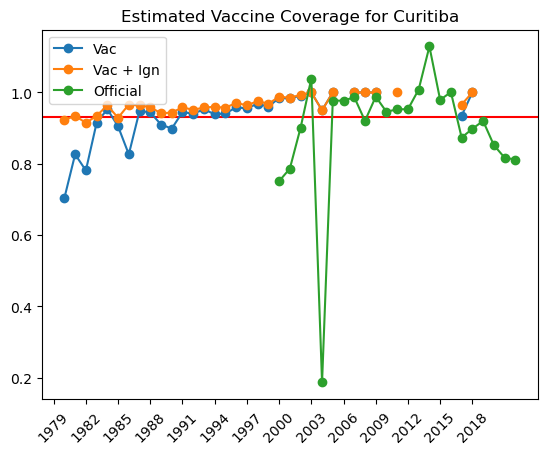

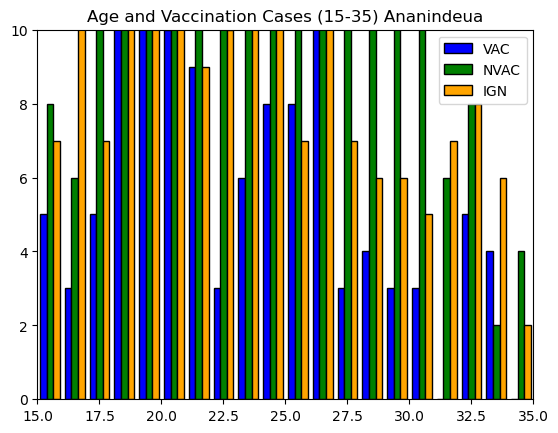

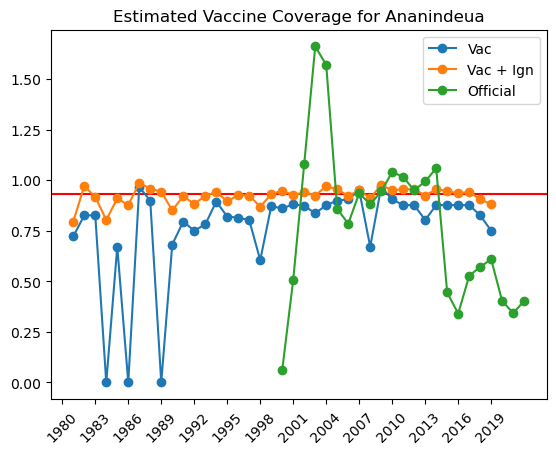

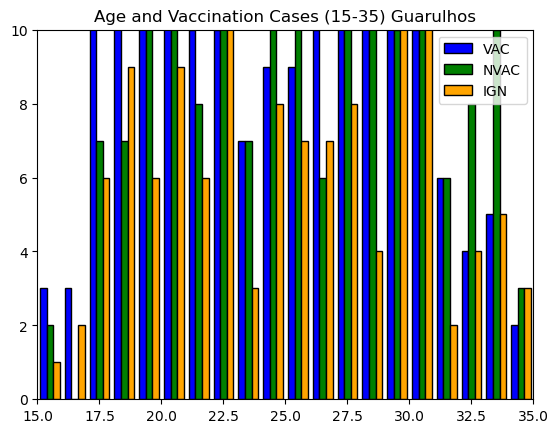

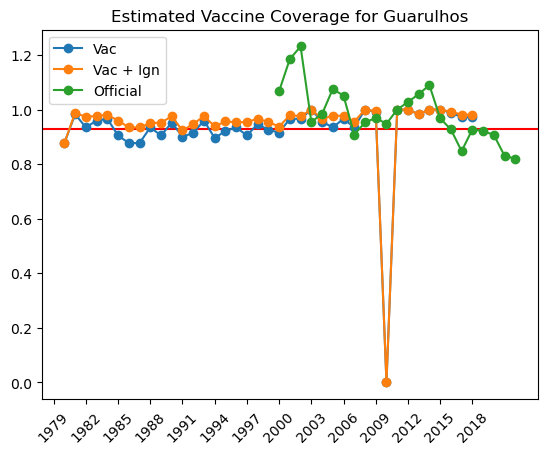

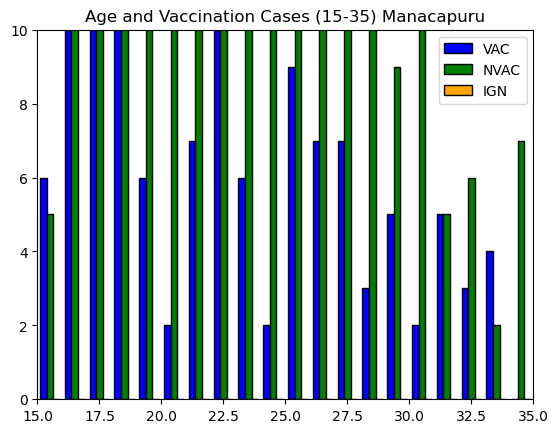

C:\Users\denis\AppData\Local\Temp\ipykernel_15000\4002450179.py:27: RuntimeWarning: invalid value encountered in divide
  p_vacs = vacs/(vacs+nvacs)
C:\Users\denis\AppData\Local\Temp\ipykernel_15000\4002450179.py:28: RuntimeWarning: invalid value encountered in divide
  p_vacs_2 = vacs_2/(vacs_2 + nvacs)


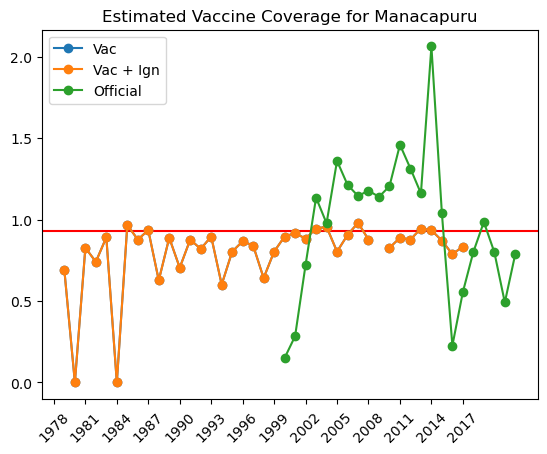

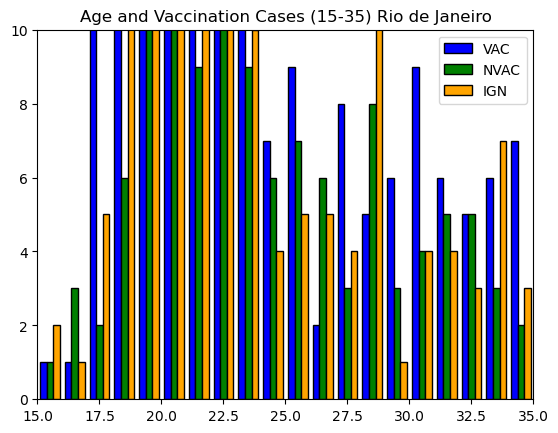

C:\Users\denis\AppData\Local\Temp\ipykernel_15000\4002450179.py:27: RuntimeWarning: invalid value encountered in divide
  p_vacs = vacs/(vacs+nvacs)


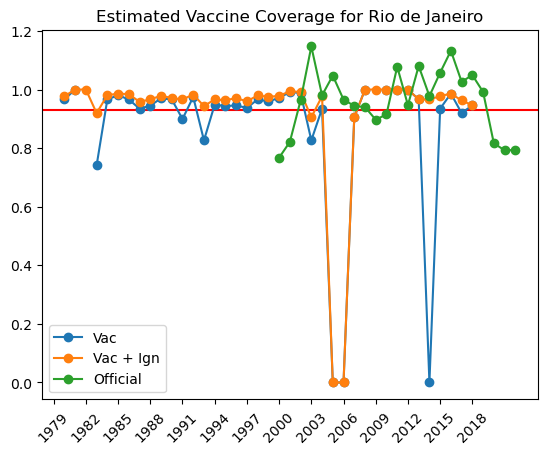

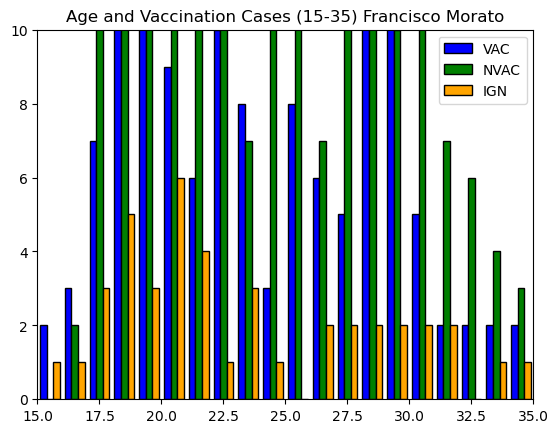

C:\Users\denis\AppData\Local\Temp\ipykernel_15000\4002450179.py:27: RuntimeWarning: invalid value encountered in divide
  p_vacs = vacs/(vacs+nvacs)
C:\Users\denis\AppData\Local\Temp\ipykernel_15000\4002450179.py:28: RuntimeWarning: invalid value encountered in divide
  p_vacs_2 = vacs_2/(vacs_2 + nvacs)


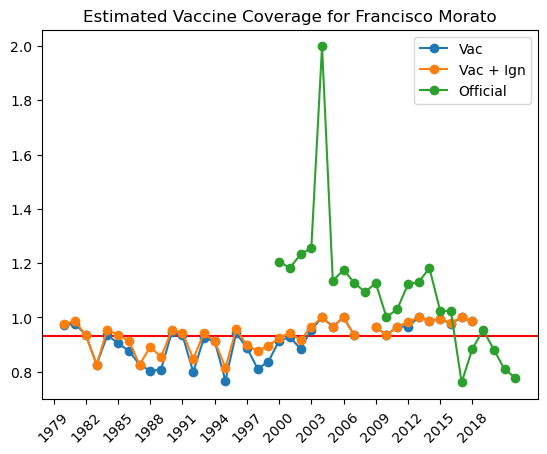

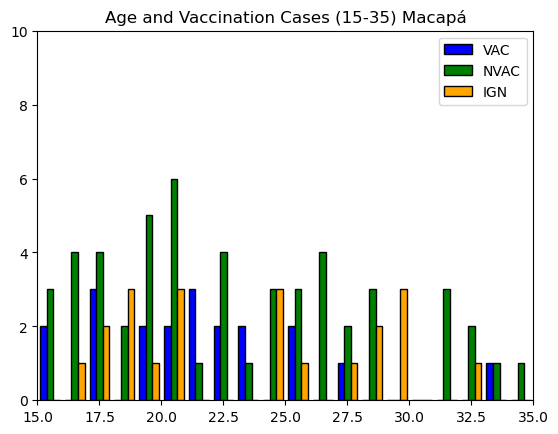

C:\Users\denis\AppData\Local\Temp\ipykernel_15000\4002450179.py:27: RuntimeWarning: invalid value encountered in divide
  p_vacs = vacs/(vacs+nvacs)
C:\Users\denis\AppData\Local\Temp\ipykernel_15000\4002450179.py:28: RuntimeWarning: invalid value encountered in divide
  p_vacs_2 = vacs_2/(vacs_2 + nvacs)


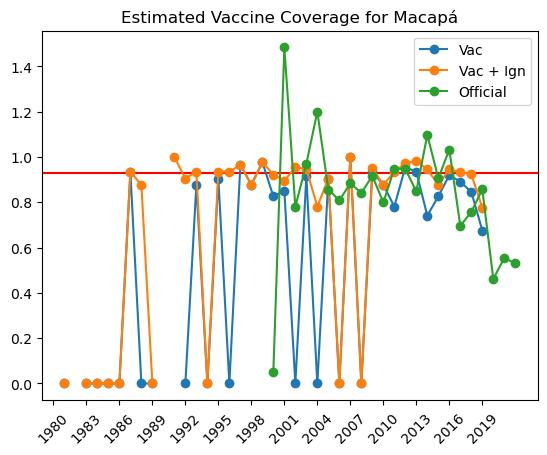

In [12]:
i = 0
for mun in first_10:
    df_tmp = df_mun[df_mun['ID_MN_RESI'] == mun]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 40]
    mun_name = df_tmp['name'].unique()[0]
    min_age = 0
    max_age = 40
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=np.arange(0,max_age+1,1), edgecolor = 'black')
    plt.title('Age and Vaccination Cases (15-35) '+ str(mun_name))
    plt.legend()
    plt.xlim((15,35))
    plt.ylim((0,10))
    plt.show()
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    vacs = vacs[1:]
    nvacs = nvacs[1:]
    ign = ign[1:]
    vacs = vacs 
    vacs_2 = vacs + ign
    p_vacs = vacs/(vacs+nvacs)
    p_vacs_2 = vacs_2/(vacs_2 + nvacs)
    c_vacs = []
    c_vacs_2 = []
    for p in p_vacs:
        if(p == np.nan):
            c_vacs.append(np.nan)
        elif(p == 0):
            c_vacs.append(0)
        else:
            c_vacs.append(coverage_age(p,0.93))
    for p in p_vacs_2:
        if(p == np.nan):
            c_vacs_2.append(np.nan)
        elif(p == 0):
            c_vacs_2.append(0)
        else:
            c_vacs_2.append(coverage_age(p,0.93))        
    plt.xticks(first_10_years[i] - np.arange(1,max_age+1,3), rotation = 45)
    plt.axhline(0.93,color = 'r')
    plt.title('Estimated Vaccine Coverage for '+ str(mun_name))
    plt.plot(first_10_years[i] - bins[1][1:-1],c_vacs,'-o', label = 'Vac')
    plt.plot(first_10_years[i] - bins[1][1:-1],c_vacs_2,'-o', label = 'Vac + Ign')
    # plotting official data
    df_1_tmp = df_1[df_1['ID_MUNICIP'] == mun]
    df_1_tmp = df_1_tmp.drop(columns = 'ID_MUNICIP')
    plt.plot(np.arange(2000,2023,1),df_1_tmp.iloc[: , 1:].T/100,'-o',label = 'Official')
    plt.legend()
    plt.show()
    i = i+1

## Estimating number of non vaccinated/totally susceptible from coverage

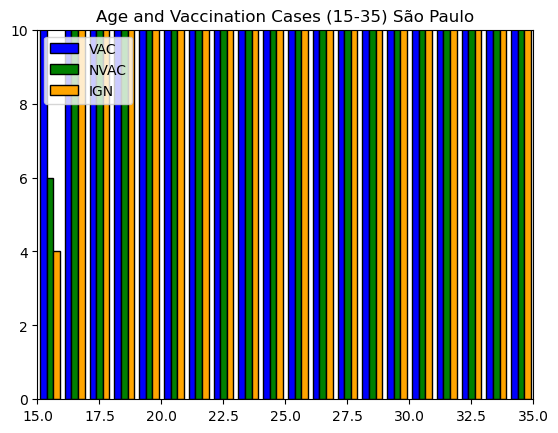

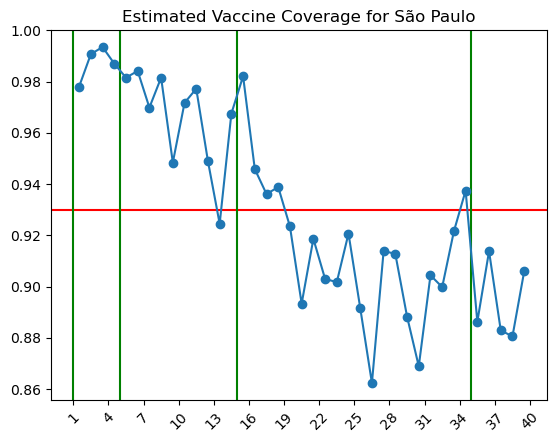

In [17]:
for mun in [first_10[0]]:
    df_tmp = df_mun[df_mun['ID_MN_RESI'] == mun]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 40]
    mun_name = df_tmp['name'].unique()[0]
    min_age = 0
    max_age = 40
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=np.arange(0,max_age+1,1), edgecolor = 'black')
    plt.title('Age and Vaccination Cases (15-35) '+ str(mun_name))
    plt.legend()
    plt.xlim((15,35))
    plt.ylim((0,10))
    plt.show()
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    vacs = vacs[1:]
    nvacs = nvacs[1:]
    ign = ign[1:]
    p_vacs = vacs/(vacs+nvacs)
    c_vacs = []
    for p in p_vacs:
        if(p == np.nan):
            c_vacs.append(np.nan)
        elif(p == 0):
            c_vacs.append(0)
        else:
            c_vacs.append(coverage_age(p,0.93))
    plt.xticks(np.arange(1,max_age+1,3), rotation = 45)
    plt.axhline(0.93,color = 'r')
    plt.axvline(1, color = 'g')
    plt.axvline(5, color = 'g')
    plt.axvline(15, color = 'g')
    plt.axvline(35, color = 'g')
    plt.title('Estimated Vaccine Coverage for '+ str(mun_name))
    plt.plot(bins[1][1:-1] + 0.5,c_vacs,'-o')
    plt.show()

In [31]:
vec_coverage = np.array([1-np.mean(c_vacs[0:4]),1-np.mean(c_vacs[4:9]),1-np.mean(c_vacs[10:15]),
                1-np.mean(c_vacs[15:20]),1-np.mean(c_vacs[20:30]), 1-np.mean(c_vacs[30:40])])
vec_population = np.array([792797,778181,790079,867374,1840611,2060804]) 

In [32]:
vec_coverage*vec_population

array([ 10083.15351693,  20963.86186155,  31577.57630358,  62883.78734946,
       187392.52639288, 198611.12776127])

In [35]:
np.sum(vec_coverage*vec_population)

511512.0331856805